In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [57]:
data=pd.read_csv('gld_price_data.csv')

In [58]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [59]:
data.shape

(2290, 6)

In [60]:
data=data.head(5)

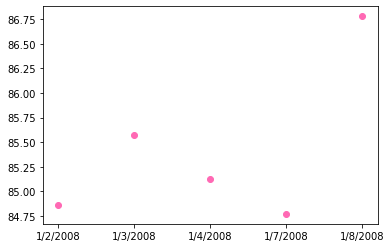

In [61]:
x=data['Date']
y=data['GLD']
plt.scatter(x, y, color = 'hotpink')
plt.show()

In [62]:
data=pd.read_csv('gld_price_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [64]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [65]:
co=data.corr()
co

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


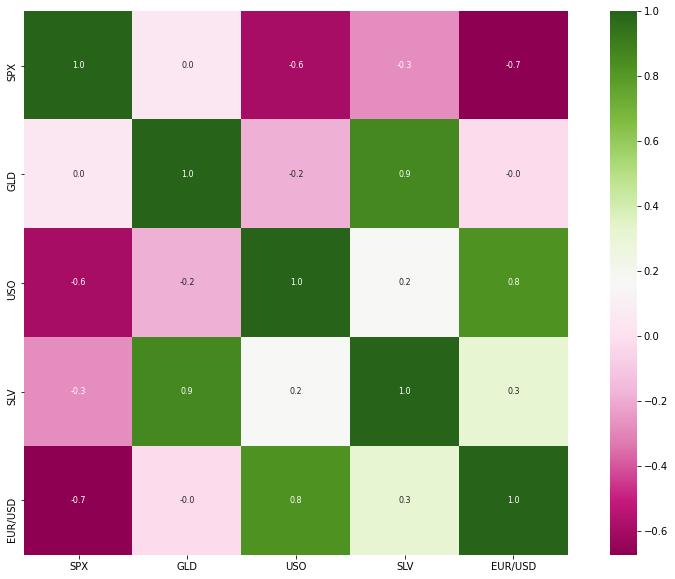

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(co,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='PiYG')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


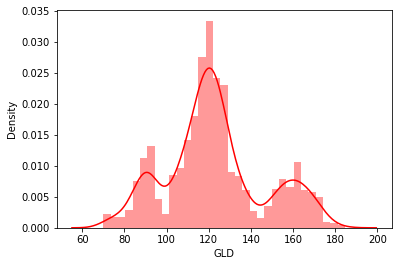

In [67]:
sns.distplot(data['GLD'],color="red")

In [68]:
X=data.drop(['Date','GLD'],axis=1)

In [69]:
Y=data['GLD']

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [71]:
reg=RandomForestRegressor()

In [72]:
reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [73]:
Y_pred=reg.predict(X_test)
Y_pred

array([168.74569994,  81.96479989, 116.15480022, 127.68220045,
       120.71540134, 154.62749767, 150.15419783, 126.14080003,
       117.48809879, 125.94140045, 116.96520079, 171.8888008 ,
       141.96129917, 167.67779831, 115.20000011, 117.72180047,
       137.94470322, 170.17450049, 160.10320349, 158.9221987 ,
       155.2652006 , 125.1986002 , 175.51820001, 156.89060246,
       125.20260029,  93.70459981,  78.02369962, 120.48990022,
       119.1571993 , 167.50830001,  88.13160031, 125.1742001 ,
        91.11050103, 117.6157002 , 121.18319937, 136.01220032,
       115.68140097, 114.90950067, 146.68219999, 107.27010094,
       104.37330253,  87.14209776, 126.57100031, 117.94239972,
       155.2232985 , 119.77209988, 108.265     , 107.84409814,
        93.20480068, 127.16019782,  75.08210029, 113.49959905,
       121.1296    , 111.17339891, 118.91519896, 120.7911992 ,
       160.06969994, 167.71320114, 147.05589643,  85.87169871,
        94.64970019,  86.81029906,  90.59930051, 118.87

In [76]:
print(Y_test)

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64


In [77]:
er=metrics.r2_score(Y_pred,Y_test)

In [78]:
er

0.9887846012462939